In [11]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [12]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(658404, 43) (658404, 1) (164601, 43) (164601, 1)


In [53]:
# param_grid={'n_neighbors':np.arange(40, 50)}
knn = KNeighborsClassifier(10)
#knn_cv = GridSearchCV(knn, param_grid, cv=5)
#knn_cv.fit(X_train, y_train)
knn.fit(X_train, y_train)


C:\Users\meske\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [54]:
y_pred = knn.predict(X_test)

In [ ]:
#knn.best_score_
#knn.best_params_

In [55]:
cl_report_knn = classification_report(y_test, y_pred)
cl_report_knn

'              precision    recall  f1-score   support\n\n         bad       0.20      0.01      0.01     11670\n        good       0.93      1.00      0.96    152931\n\n    accuracy                           0.93    164601\n   macro avg       0.56      0.50      0.49    164601\nweighted avg       0.88      0.93      0.90    164601\n'

In [56]:
print(cl_report_knn)

              precision    recall  f1-score   support

         bad       0.20      0.01      0.01     11670
        good       0.93      1.00      0.96    152931

    accuracy                           0.93    164601
   macro avg       0.56      0.50      0.49    164601
weighted avg       0.88      0.93      0.90    164601



In [57]:
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[    79,  11591],
       [   326, 152605]], dtype=int64)

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

C:\Users\meske\AppData\Local\Temp/ipykernel_1740/1420609402.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=1)

In [5]:
y_pred = rf.predict(X_test)

In [6]:
cl_report_rf = classification_report(y_test, y_pred)
print(cl_report_rf)
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)

              precision    recall  f1-score   support

         bad       0.25      0.00      0.00     11670
        good       0.93      1.00      0.96    152931

    accuracy                           0.93    164601
   macro avg       0.59      0.50      0.48    164601
weighted avg       0.88      0.93      0.90    164601

[[     9  11661]
 [    27 152904]]


In [66]:
n = [50, 100, 200, 300]
for i in n:
    rf = RandomForestClassifier(n_estimators=i, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    cm_rf = confusion_matrix(y_test, y_pred)
    print('n_estimators = ', i)
    print(cm_rf)

C:\Users\meske\AppData\Local\Temp/ipykernel_6304/2830024118.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


n_estimators =  50
[[    17  11653]
 [    43 152888]]


C:\Users\meske\AppData\Local\Temp/ipykernel_6304/2830024118.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


n_estimators =  100
[[     9  11661]
 [    27 152904]]


C:\Users\meske\AppData\Local\Temp/ipykernel_6304/2830024118.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


n_estimators =  200
[[     8  11662]
 [    20 152911]]


C:\Users\meske\AppData\Local\Temp/ipykernel_6304/2830024118.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


n_estimators =  300
[[    10  11660]
 [    17 152914]]


In [ ]:
# The False Negative rate is extermely high. 

n = [1000, 2000, 3000]
for i in n:
    rf = RandomForestClassifier(n_estimators=i, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    cm_rf = confusion_matrix(y_test, y_pred)
    print('n_estimators = ', i)
    print(cm_rf)

C:\Users\meske\AppData\Local\Temp/ipykernel_6304/2802223475.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


n_estimators =  1000
[[     9  11661]
 [    12 152919]]


C:\Users\meske\AppData\Local\Temp/ipykernel_6304/2802223475.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Feature: 0, Score: 0.11105
Feature: 1, Score: 0.11108
Feature: 2, Score: 0.15987
Feature: 3, Score: 0.14187
Feature: 4, Score: 0.17100
Feature: 5, Score: 0.02734
Feature: 6, Score: 0.03191
Feature: 7, Score: 0.10716
Feature: 8, Score: 0.00279
Feature: 9, Score: 0.00138
Feature: 10, Score: 0.00304
Feature: 11, Score: 0.00315
Feature: 12, Score: 0.00807
Feature: 13, Score: 0.00729
Feature: 14, Score: 0.00846
Feature: 15, Score: 0.00779
Feature: 16, Score: 0.00705
Feature: 17, Score: 0.00742
Feature: 18, Score: 0.00592
Feature: 19, Score: 0.00645
Feature: 20, Score: 0.00604
Feature: 21, Score: 0.00550
Feature: 22, Score: 0.00973
Feature: 23, Score: 0.00005
Feature: 24, Score: 0.00018
Feature: 25, Score: 0.00371
Feature: 26, Score: 0.00374
Feature: 27, Score: 0.00003
Feature: 28, Score: 0.00003
Feature: 29, Score: 0.00174
Feature: 30, Score: 0.00635
Feature: 31, Score: 0.00933
Feature: 32, Score: 0.00041
Feature: 33, Score: 0.00454
Feature: 34, Score: 0.00152
Feature: 35, Score: 0.00304
Fe

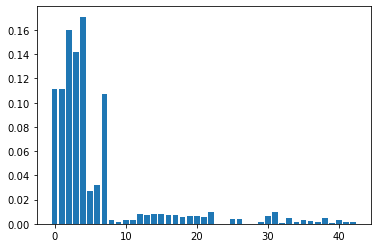

In [7]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [4]:
X_train.columns
X_train = X_train[['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc']]
X_train.head()
X_test = X_test[['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc']]
X_test.head()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,open_acc
0,0.608758,0.610845,-0.129683,-0.348218,-0.061709,-0.866226
1,0.014777,0.016456,1.049440,-0.652381,1.317903,0.074381
2,-0.104019,-0.102421,0.394878,-0.945460,-0.357513,-0.866226
3,-1.054389,-1.053442,-0.259683,-0.037652,-0.989128,0.826867
4,1.202739,1.205233,1.054001,0.308748,0.567481,0.638746


In [8]:
n = [1000]
for i in n:
    rf = RandomForestClassifier(n_estimators=i, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    cm_rf = confusion_matrix(y_test, y_pred)
    print('n_estimators = ', i)
    print(cm_rf)

C:\Users\meske\AppData\Local\Temp/ipykernel_1900/388880135.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


n_estimators =  1000
[[    21  11649]
 [   122 152809]]


In [6]:
y_train.value_counts()

loan_status
good           613204
bad             45200
dtype: int64

In [17]:
# Removed funded amount column since it is duplicated information. I Added the one-hot-encoded employment length columns.

X_train.columns
X_train = X_train[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc']]
X_train.head()
X_test = X_test[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc']]
X_test.head()


,loan_amnt,int_rate,annual_inc,dti,open_acc
0,0.608758,-0.129683,-0.348218,-0.061709,-0.866226
1,0.014777,1.049440,-0.652381,1.317903,0.074381
2,-0.104019,0.394878,-0.945460,-0.357513,-0.866226
3,-1.054389,-0.259683,-0.037652,-0.989128,0.826867
4,1.202739,1.054001,0.308748,0.567481,0.638746


In [18]:
n = [500]
for i in n:
    rf = RandomForestClassifier(n_estimators=i, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    cm_rf = confusion_matrix(y_test, y_pred)
    print('n_estimators = ', i)
    print(cm_rf)

C:\Users\meske\AppData\Local\Temp/ipykernel_1900/3629789083.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


n_estimators =  500
[[    25  11645]
 [   122 152809]]


In [20]:
print(y_test.value_counts())

# The model gets almost all of the bad outcomes wrong. 11645 out of 11670 total bad outcomes are predicted wrong.
# But the prediction for the good outcomes is good. 152809 of the 152931 are predicted correctly.



loan_status
good           152931
bad             11670
dtype: int64


0.0763089236322263

In [21]:
y_train.value_counts()

loan_status
good           613204
bad             45200
dtype: int64

In [24]:
print(45200/658404)
print(613204/658404)

0.06865085874326401
0.931349141256736


The issue is the data is highly imbalanced. 7% belongs to the bad class and 93% belongs to the good class. 
Trying Undersampling the majority class. This option is chosen because the data is very large.

In [41]:
# Undersampling the majority class
# reading the dataframe before the split

df = pd.read_csv('df_before_split.csv')

In [42]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'term', 'emp_length',
       'home_ownership', 'application_type', 'purpose', 'loan_status'],
      dtype='object')

In [43]:
# Selecting columns in light of the feature importance done above.

df = df[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'loan_status']]
df.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,loan_status
0,5000.0,10.65,24000.0,27.65,3.0,good
1,2500.0,15.27,30000.0,1.00,3.0,bad
2,2400.0,15.96,12252.0,8.72,2.0,good
3,10000.0,13.49,49200.0,20.00,10.0,good
4,3000.0,12.69,80000.0,17.94,15.0,good


In [44]:
df_good = df[df['loan_status'] == 'good']
df_bad = df[df['loan_status'] == 'bad']

In [46]:
print('good loan_status', df_good.shape)
print('bad loan_status', df_bad.shape)

good loan_status (766135, 6)
bad loan_status (56870, 6)


In [48]:
df_good_under = df_good.sample(56870)
df_good_under.shape

(56870, 6)

In [51]:
# combine the undersampled good class and the bad class to form a balanced data set

df_balanced = pd.concat([df_good_under, df_bad], axis=0)
df_balanced.shape

(113740, 6)

In [56]:
# Separate the data to X and y

X = df_balanced[['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc']]
y = df_balanced['loan_status']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
y_train.value_counts()

bad     45496
good    45496
Name: loan_status, dtype: int64

In [63]:
y_test.value_counts()

bad     11374
good    11374
Name: loan_status, dtype: int64

In [65]:
n = [50, 100, 300, 600, 900]
for i in n:
    rf = RandomForestClassifier(n_estimators=i, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    cl_report = classification_report(y_test, y_pred)
    print('n_estimators = ', i)
    print(cl_report)

n_estimators =  50
              precision    recall  f1-score   support

         bad       0.64      0.69      0.66     11374
        good       0.66      0.61      0.64     11374

    accuracy                           0.65     22748
   macro avg       0.65      0.65      0.65     22748
weighted avg       0.65      0.65      0.65     22748

n_estimators =  100
              precision    recall  f1-score   support

         bad       0.65      0.69      0.67     11374
        good       0.67      0.62      0.64     11374

    accuracy                           0.66     22748
   macro avg       0.66      0.66      0.65     22748
weighted avg       0.66      0.66      0.65     22748

n_estimators =  300
              precision    recall  f1-score   support

         bad       0.65      0.69      0.67     11374
        good       0.67      0.62      0.64     11374

    accuracy                           0.66     22748
   macro avg       0.66      0.66      0.66     22748
weighted avg   

In [ ]:
# 600 n_estimators seems to give the best result with f1 score 67% for the 'bad' class and 65% f1 score for the 'good' class.

In [70]:
# Trying Grid Search with Random Forest to find the best paramaters

params = {'n_estimators':[50, 200, 400, 600, 800, 1000]}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
gs = GridSearchCV(estimator=rf, param_grid = params, n_jobs=-1)

gs_rf = gs.fit(X_train, y_train)
y_pred = gs_rf.predict(X_test)

print(gs_rf.best_score_)
print(gs_rf.best_params_)

0.6565741988833191
{'n_estimators': 800}
